# Fishery Data Exploration
The purpose of this competition on [Kaggle](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring) is to develop a model that classifies species of fish within a collection of images.  This notebook exhibits a brief exploration of the dataset and preprocesses the data for model development later.  Images are stored in the working directory folder 'data', sub-divided by train and test set.  The training set are also sub-divided by species, while the test_stg1 set are mixed and not separated by species folders.

#### Dependencies

In [1]:
import numpy as np
from scipy import ndimage, misc
import os
import matplotlib.pyplot as plt
%matplotlib inline
from six.moves import cPickle as pickle



## Questions
### Are the images of similar aspect and pixel sizes?

In [2]:
print(os.listdir('data'))
print(os.listdir('data/train'))
print(os.listdir('data/train/ALB')[0:10])

['.DS_Store', 'test_stg1', 'train']
['.DS_Store', 'ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
['img_00003.jpg', 'img_00010.jpg', 'img_00012.jpg', 'img_00015.jpg', 'img_00019.jpg', 'img_00020.jpg', 'img_00029.jpg', 'img_00032.jpg', 'img_00037.jpg', 'img_00038.jpg']


In [3]:
for fish in os.listdir('data/train')[1:] :
    for image in os.listdir('data/train/'+fish)[0:3] :
        arr = ndimage.imread('data/train/'+fish+'/'+image, flatten = False)
        print("Shape: {}      Aspect Ratio: {:.2f}".format(arr.shape, arr.shape[1]/arr.shape[0]))

Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (974, 1280, 3)      Aspect Ratio: 1.31
Shape: (854, 1518, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (750, 1280, 3)      Aspect Ratio: 1.71
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (750, 1280, 3)      Aspect Ratio: 1.71
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (720, 1280, 3)      Aspect Ratio: 1.78
Shape: (974, 1280, 3)      Aspect 

**Answer:** Images appear to be of different pixel sizes and aspect ratios, and are RGB format.  

### How many of each fish species are present in the training set?

In [4]:
count = 0
for fish in os.listdir('/'.join(['data','train'])) :
    try : 
        print("{} contains {} images".format(fish, len(os.listdir('/'.join(['data','train',fish])))))
        count += len(os.listdir('/'.join(['data','train',fish])))
    #print(fish)
    except :
        pass
print("\nTOTAL TRAINING IMAGES: {}".format(count))                      

ALB contains 1719 images
BET contains 200 images
DOL contains 117 images
LAG contains 67 images
NoF contains 465 images
OTHER contains 299 images
SHARK contains 176 images
YFT contains 734 images

TOTAL TRAINING IMAGES: 3777


**Answer:** The counts of each fish are not equal in the training set.  Special precautions will be taken to avoid problems associated with unbalanced data sets.  3777 is not a vast amount for neural network training.  One potential strategy is to duplicate images with distortion in order to balance the dataset and provide extra training examples.  

**NOTE:** A fn has been written to generate a list of filenames for a data input pipeline.  This, and other helper functions will be deposited into a script named 'fish_data.py'. 

### What is the average pixel value in each channel for the full training dataset?

In [5]:
import fish_data as fd
help(fd.generate_filenames_list)

Help on function generate_filenames_list in module fish_data:

generate_filenames_list(subdirectory='data/train/', subfolders=True)
    Returns a list of filenames in a given directory.  If subfolders is
    set to True, then fn will also iterate through all subfolders.



In [6]:
filenames = fd.generate_filenames_list(subdirectory= 'data/train/', subfolders = True)
print(filenames[0:2])
test_filenames = fd.generate_filenames_list(subdirectory = 'data/test_stg1/', subfolders = False)
print(test_filenames[0:2])

['data/train/ALB/img_00003.jpg', 'data/train/ALB/img_00010.jpg']
['data/test_stg1/img_00005.jpg', 'data/test_stg1/img_00007.jpg']


In [8]:
mean_red, mean_green, mean_blue = [], [], []
mean_y, mean_x, mean_aspect = [], [], []
for im in filenames :
    img = ndimage.imread(im)
    mean_red.append(np.mean(img[:,:,0]))
    mean_green.append(np.mean(img[:,:,1]))
    mean_blue.append(np.mean(img[:,:,2]))
    mean_y.append(img.shape[0])
    mean_x.append(img.shape[1])
    mean_aspect.append(img.shape[1]/img.shape[0])

In [11]:
R_offset = np.mean(mean_red)
G_offset = np.mean(mean_green)
B_offset = np.mean(mean_blue)
print("Mean y_dimension: {:.2f} ({} to {})".format(np.mean(mean_y), np.min(mean_y), np.max(mean_y)))
print("Mean x_dimension: {:.2f} ({} to {})".format(np.mean(mean_x), np.min(mean_x), np.max(mean_x)))
print("Mean aspect ratio: {:.2f} ({:.2f} to {:.2f})".format(np.mean(mean_aspect),np.min(mean_aspect), np.max(mean_aspect) ))

print("Average pixel values\n     red: {}\n     green: {}\n     blue: {}".format(R_offset, G_offset, B_offset))

Mean y_dimension: 755.66 (670 to 974)
Mean x_dimension: 1281.99 (1192 to 1732)
Mean aspect ratio: 1.71 (1.31 to 1.78)
Average pixel values
     red: 96.48265253757386
     green: 107.20367931267522
     blue: 99.97448662926035


## Image Inspection and strategy for coarse generation

In [12]:
help(fd.show_panel)

Help on function show_panel in module fish_data:

show_panel(image)
    Shows an RGB montage of an image in array form.



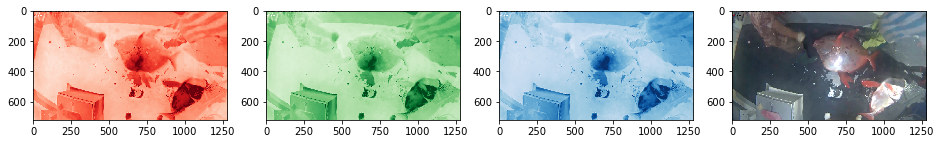

In [14]:
ex_img = ndimage.imread('data/train/LAG/'+os.listdir('data/train/LAG')[0])
fd.show_panel(ex_img)

#### Image resize

The smallest dimension should be to 256. 

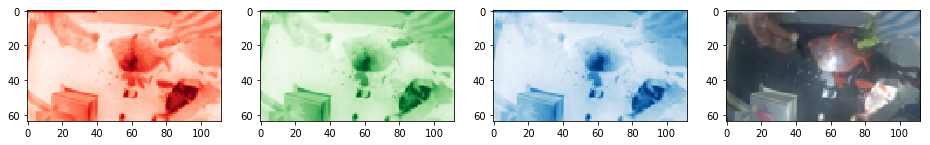

In [16]:
mod_ex_img = misc.imresize(ex_img, size = (64,112, 3))
fd.show_panel(mod_ex_img)

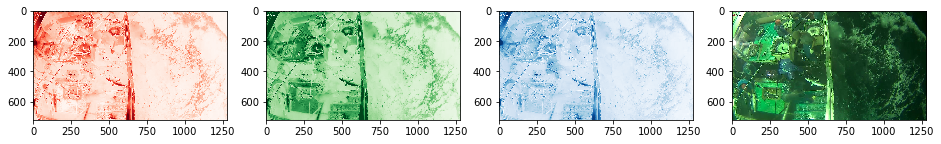

In [18]:
ex_img = ndimage.imread('data/train/SHARK/'+os.listdir('data/train/SHARK')[0])
fd.show_panel(ex_img)

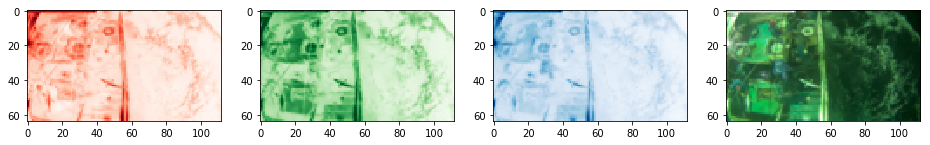

In [19]:
mod_ex_img = misc.imresize(ex_img, size = (64,112, 3))
fd.show_panel(mod_ex_img)

**NOTES:**  This image scaling appears appropriate for images where fish are both prominant and dimunitive in the frame.  For Icoarse generation, images will be resized to 64, 112, 3.  

## Strategy for Fish Crop

In [45]:
from importlib import reload

In [47]:
f = 'data/train/SHARK/'+os.listdir('data/train/SHARK')[0]


In [67]:
reload(fd)
help(fd.boxit)

Help on function boxit in module fish_data:

boxit(f, coarse_dims=[64, 112, 3], fov_dim=72)
    Function to efficiently annotate squared bbox from coarse images of
    a standard dimension (which may not necessarily reflect the original
    dimensions of the high-resolution image).



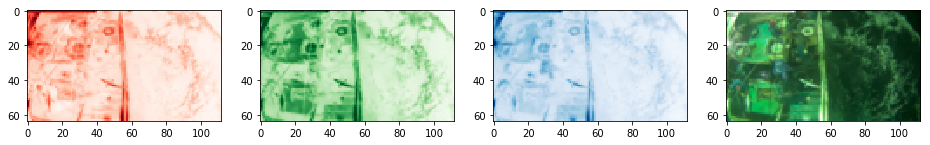

y coordinate of top left border   34
x coordinate of the top left border   42
y coordinate of bottom right border   49
x coordinate of bottom right border   56


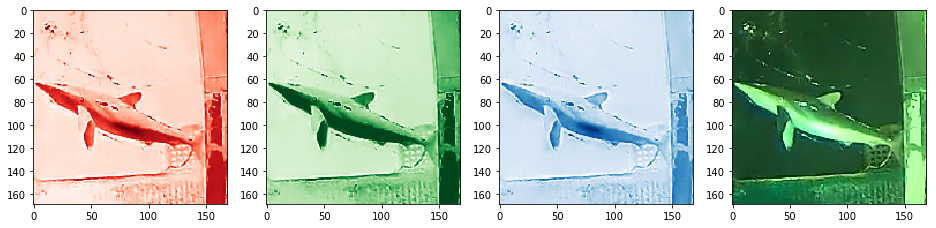

Adjustments needed? (y/n)    n


(array([ 0.53055556,  0.371875  ]), 0.42603550295857989)

In [68]:
fd.boxit(f, coarse_dims = [64,112,3])

### Strategy for Fovea retrieval 

In [70]:
scale = 0.42603550295857989

In [69]:
tl = np.array([ 0.53055556,  0.371875  ])

In [71]:
fov_dim = 72

In [83]:
reload(fd)
help(fd.retrieve_fovea)

Help on function retrieve_fovea in module fish_data:

retrieve_fovea(f, top_left_coords, scale, fov_dim=72)
    Retrieves a standard sized fovea based on the coordinates of the top left
    of a bounding box, plus the scale that yields an appropriate zoom for a
    circumscribing box of known size.



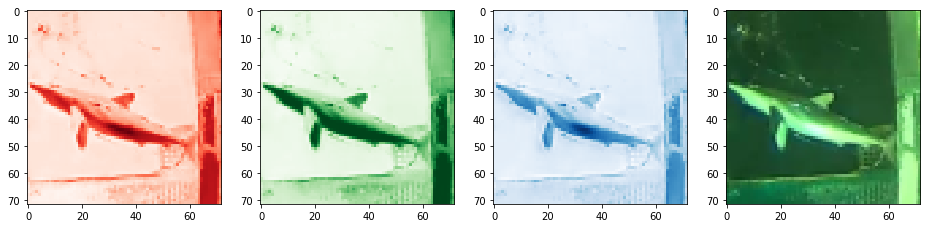

In [84]:
arr = fd.retrieve_fovea(f, top_left_coords = tl, scale = scale, fov_dim = 72)
fd.show_panel(arr)